# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간대별승하차 파일 받기
- 최신 csv 파일로 받기 </br>
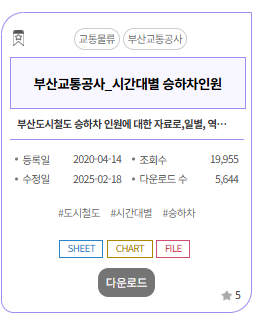


In [1]:
import pandas as pd
file_path = "./ref/일별 역별 시간대별 승하차(2023년 12월).csv"
df = pd.read_csv(file_path, encoding='EUC-KR')
df.head() # 맨 앞 데이터 5개 가져오기
#data.tail() # 맨 뒤

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2023-01-01,일,승차,6311,0,0,0,9,...,435,398,336,272,130,138,71,66,7,3
1,95,다대포해수욕장,2023-01-01,일,하차,5839,2,0,0,0,...,313,299,269,126,128,94,115,71,43,29
2,95,다대포해수욕장,2023-01-02,월,승차,4264,0,0,0,18,...,417,262,243,224,133,87,79,62,8,0
3,95,다대포해수욕장,2023-01-02,월,하차,3300,0,0,0,0,...,259,262,260,285,216,153,103,105,57,29
4,95,다대포해수욕장,2023-01-03,화,승차,4431,1,1,0,27,...,401,310,310,229,132,110,71,65,21,0


In [2]:
columns = ['num','name','date','week','type','total']
time_col = [f"{i}~{i+1}H"for i in range(1,24)]
columns = columns + time_col +['24~01H']
df.columns = columns
df = df.loc[:,:'total']
df.head()

,num,name,date,week,type,total
0,95,다대포해수욕장,2023-01-01,일,승차,6311
1,95,다대포해수욕장,2023-01-01,일,하차,5839
2,95,다대포해수욕장,2023-01-02,월,승차,4264
3,95,다대포해수욕장,2023-01-02,월,하차,3300
4,95,다대포해수욕장,2023-01-03,화,승차,4431


In [3]:
data = df.groupby(['num','name','date']).sum().reset_index()
#data[data['data']=='2023-01-01']
data

,num,name,date,week,type,total
0,95,다대포해수욕장,2023-01-01,일일,승차하차,12150
1,95,다대포해수욕장,2023-01-02,월월,승차하차,7564
2,95,다대포해수욕장,2023-01-03,화화,승차하차,7937
3,95,다대포해수욕장,2023-01-04,수수,승차하차,8338
4,95,다대포해수욕장,2023-01-05,목목,승차하차,8449
...,...,...,...,...,...,...
40875,414,안평,2023-12-27,수수,승차하차,4081
40876,414,안평,2023-12-28,목목,승차하차,4159
40877,414,안평,2023-12-29,금금,승차하차,4192
40878,414,안평,2023-12-30,토토,승차하차,3281


In [4]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'], ascending=[True,True])
gdata.head(10)

,name,date,total
10950,1동래,2023-01-01,19692
10951,1동래,2023-01-02,32591
10952,1동래,2023-01-03,33105
10953,1동래,2023-01-04,33511
10954,1동래,2023-01-05,35943
10955,1동래,2023-01-06,38692
10956,1동래,2023-01-07,34052
10957,1동래,2023-01-08,21938
10958,1동래,2023-01-09,34547
10959,1동래,2023-01-10,35034


In [5]:
mdata = gdata.groupby(by='name').sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,1동래,8062476
1,1서면,16816218
2,1연산,8301582
3,2덕천,2767436
4,2서면,11291496
...,...,...
114,토성,6212747
115,하단,12980735
116,해운대,9657955
117,호포,889486


In [6]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)

,name,total
1,1서면,16816218
72,부산역,16304495
76,사상,15302694
81,서면,14606432
83,센텀시티,14005747
32,남포,13324956
115,하단,12980735
99,자갈치,12775651
75,부전,11805080
13,경성대부경대,11647344


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

In [8]:
#for font in fm.findSystemFonts():
#    print(font)
#print(plt.rcParams["font.family"])

In [9]:
#!pip install squarify

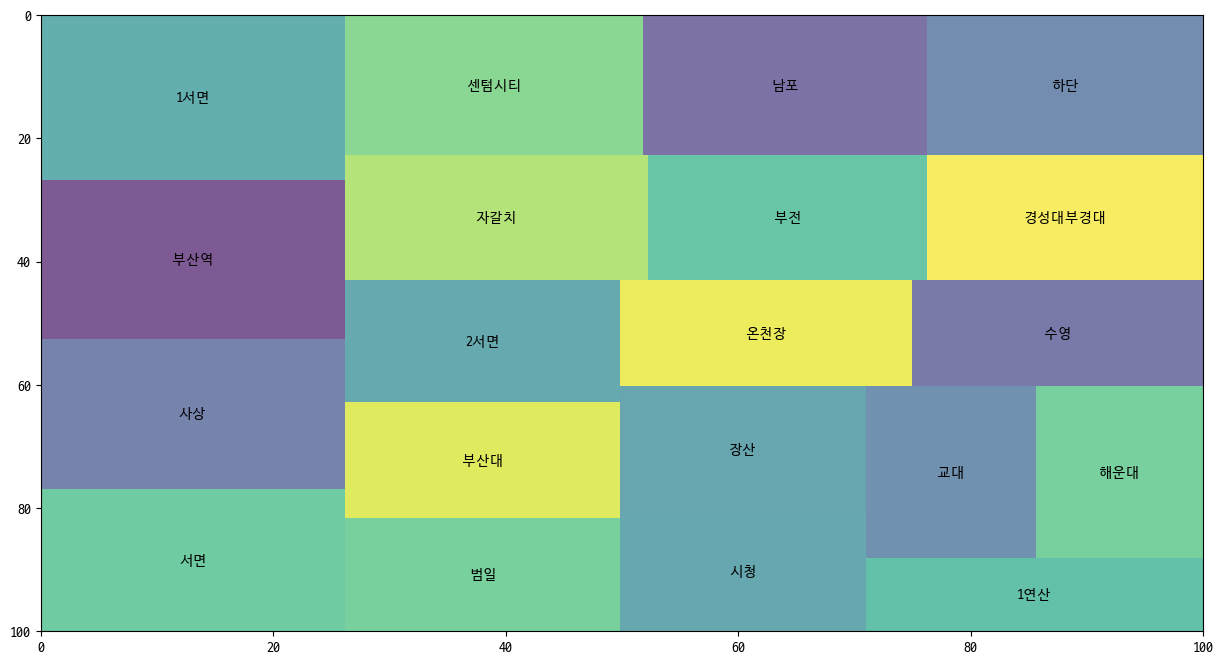

In [10]:
import squarify
plt.figure(figsize=(15,8))
squarify.plot(sizes=sdata['total'].iloc[:20], label=sdata['name'].iloc[:20], alpha=0.7)
plt.rcParams["font.size"]=18
#plt.rcParams["text.color"]='blue'
plt.gca().invert_yaxis()
plt.savefig("subway01.png")
plt.show()

In [11]:
import pandas as pd
file_path = "./ref/행정동별 지하철 승객수.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")
df

,일시,행정동,전체,0시~7시,7시~8시,8시~9시,9시~12시,12시~17시,17시~18시,18시~19시,19시~24시
0,2024-10-31,부평구 부평1동,"50,354","4,440","6,180","5,459","7,475","12,324","3,223","3,269","7,984"
1,2024-10-31,중구 운서동,"36,378","2,555","2,376","2,144","4,166","11,207","3,310","3,261","7,359"
2,2024-10-31,연수구 송도1동,"23,988","1,044","1,653","1,565","1,870","6,082","3,118","3,675","4,981"
3,2024-10-31,계양구 계양1동,"23,929","3,103","4,788","3,903","4,595","4,193",952,988,"1,407"
4,2024-10-31,연수구 송도4동,"22,554","1,256","1,935","1,903","2,440","6,335","2,457","2,382","3,846"
...,...,...,...,...,...,...,...,...,...,...,...
151,2024-10-31,남동구 남촌도림동,0,0,0,0,0,0,0,0,0
152,2024-10-31,남동구 만수4동,0,0,0,0,0,0,0,0,0
153,2024-10-31,남동구 만수3동,0,0,0,0,0,0,0,0,0
154,2024-10-31,남동구 만수2동,0,0,0,0,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   일시       156 non-null    object
 1   행정동      156 non-null    object
 2   전체       156 non-null    object
 3   0시~7시    156 non-null    object
 4   7시~8시    156 non-null    object
 5   8시~9시    156 non-null    object
 6   9시~12시   156 non-null    object
 7   12시~17시  156 non-null    object
 8   17시~18시  156 non-null    object
 9   18시~19시  156 non-null    object
 10  19시~24시  156 non-null    object
dtypes: object(11)
memory usage: 13.5+ KB


In [13]:
df.columns

Index(['일시', '행정동', '전체', '0시~7시', '7시~8시', '8시~9시', '9시~12시', '12시~17시',
       '17시~18시', '18시~19시', '19시~24시'],
      dtype='object')

In [14]:
columns = ['date', 'name', 'total', '0시~7시', '7시~8시', '8시~9시', '9시~12시', '12시~17시',
       '17시~18시', '18시~19시', '19시~24시']
df.columns = columns
df = df.loc[:,: 'total']
df

,date,name,total
0,2024-10-31,부평구 부평1동,"50,354"
1,2024-10-31,중구 운서동,"36,378"
2,2024-10-31,연수구 송도1동,"23,988"
3,2024-10-31,계양구 계양1동,"23,929"
4,2024-10-31,연수구 송도4동,"22,554"
...,...,...,...
151,2024-10-31,남동구 남촌도림동,0
152,2024-10-31,남동구 만수4동,0
153,2024-10-31,남동구 만수3동,0
154,2024-10-31,남동구 만수2동,0


In [15]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

C:\Users\Admin\AppData\Local\Temp\ipykernel_9876\1424101299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total'] = df['total'].astype(str).str.replace(',', '').astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9876\1424101299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total'] = df['total'].fillna(0)


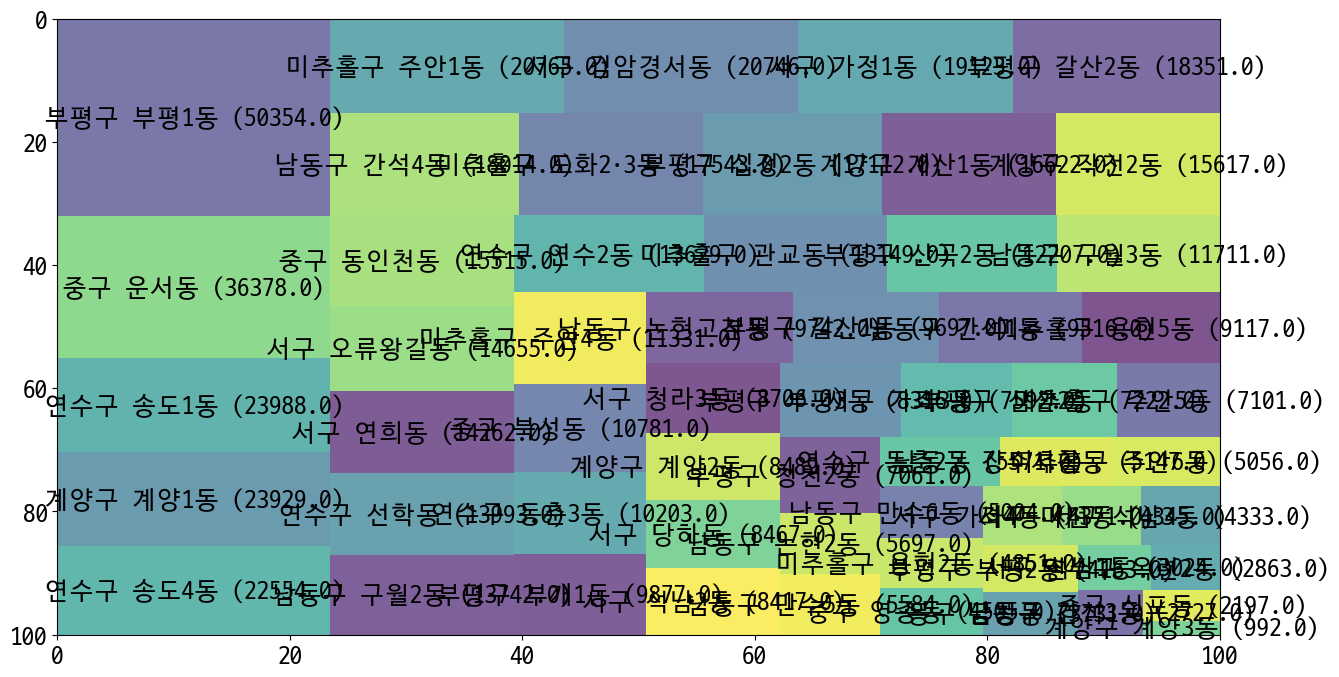

In [16]:
import squarify
import matplotlib.pyplot as plt

df['total'] = df['total'].astype(str).str.replace(',', '').astype(float)
df['total'] = df['total'].fillna(0)
df = df[df['total'] > 0]
labels = [f"{n} ({t})" for n, t in zip(df['name'], df['total'])]
plt.figure(figsize=(15, 8))
squarify.plot(sizes=df['total'], label=labels, alpha=0.7)

plt.rcParams["font.size"] = 15
plt.gca().invert_yaxis()
